# Filtering results

A simulation model might output a large number of performance measures.  If you wish to have a graphical view of all measures you may find it infeasible to include individual plots. In these circumstances you may want a user to be able to select which measure is displayed on a single plot included in the app.

There are multiple ways to achieve this aim.  Here we demonstrate using `plotly` itself rather than relying on creating your own logic within the `streamlit` script.  

## 1. Imports

In [2]:
import plotly.graph_objects as go

from model import Experiment, multiple_replications

## 2. `plotly` code

To achieve our aims we must use `plotly.graph_objects`.  A modified results histogram is implemented below in the function `create_user_filtered_hist()`. 

> Note that the listing is specific for a histogram.  If a different type of plot was needed then the code would need to be modified. 

In [98]:
def create_user_filtered_hist(results):
    '''
    Create a plotly histogram that includes a drop down list that allows a user
    to select which KPI is displayed as a histogram
    
    Params:
    -------
    results: pd.Dataframe
        rows = replications, cols = KPIs
        
    Returns:
    -------
    plotly.figure
    
    Sources:
    ------
    The code in this function was parly adapted from two sources:
    1. https://stackoverflow.com/questions/59406167/plotly-how-to-filter-a-pandas-dataframe-using-a-dropdown-menu
    
    Thanks and credit to `vestland` the author of the reponse.
    
    2. https://plotly.com/python/dropdowns/
    '''
    # create a figure
    fig = go.Figure()

    # set up a trace
    fig.add_trace(go.Histogram(x=results[results.columns[0]]))

    buttons = []

    # create list of drop down items - KPIs
    # the params in the code would need to vary depending on the type of chart.
    # The histogram will show the first KPI by default
    for col in results.columns:
        buttons.append(dict(method='restyle',
                            label=col,
                            visible=True,
                            args=[{'x':[results[col]],
                                   'type':'histogram'}, [0]],
                            )
                      )

    # create update menu and parameters
    updatemenu = []
    your_menu = dict()
    updatemenu.append(your_menu)

    updatemenu[0]['buttons'] = buttons
    updatemenu[0]['direction'] = 'down'
    updatemenu[0]['showactive'] = True
    updatemenu[0]['x'] = 0.25
    updatemenu[0]['y'] = 1.1
    updatemenu[0]['xanchor'] = 'right'
    updatemenu[0]['yanchor'] = 'bottom'
    #updatemenu[0]['pad'] = {"r": 10, "t": 10}
    
    
    
    # add dropdown menus to the figure
    fig.update_layout(showlegend=False, 
                      updatemenus=updatemenu)
    
    
    # add label for selecting performance measure
    fig.update_layout(
    annotations=[
        dict(text="Performance measure", x=0, xref="paper", y=1.25, 
             yref="paper", align="left", showarrow=False)
    ])
    return fig

In [99]:
# code to create the histogram

default_exp = Experiment()
results = multiple_replications(default_exp, n_reps=100)

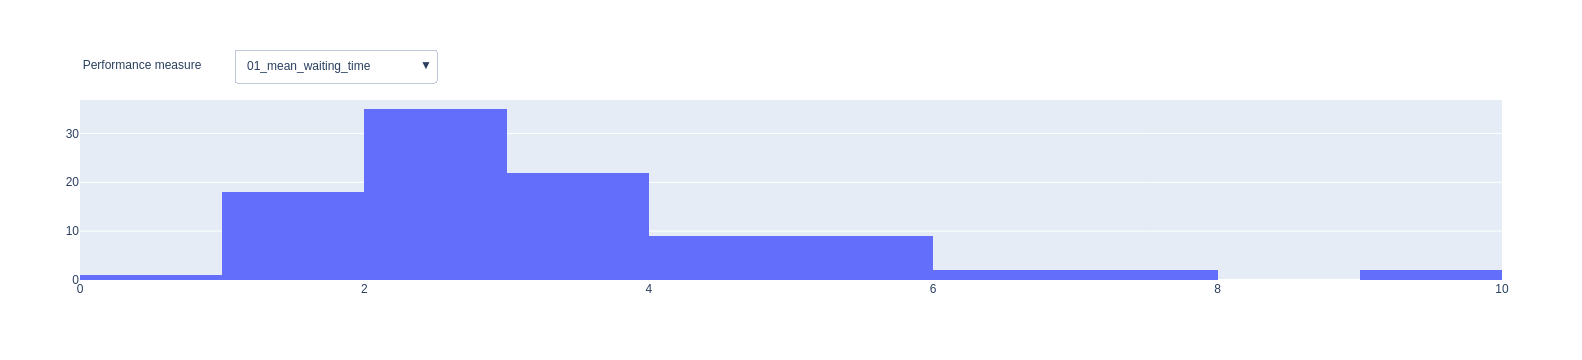

In [100]:
create_user_filtered_hist(results)

The listing below is a new module called `app_with_filter.py`. It updates our histogram code to allowing filtering of results.  Underneath is a screenshot of the new web app.

```python
"""
The code in this streamlit script adds in a plotly 
chart to display a histogram of replications. The results shown in the 
histogram can be selected by the user.
"""
import streamlit as st

#################################################################################
# MODIFICATION: import graph_objects instead of plotly.express
import plotly.graph_objects as go
#################################################################################
from model import Experiment, multiple_replications

INTRO_FILE = './resources/model_info.md'

def read_file_contents(file_name):
    ''''
    Read the contents of a file.

    Params:
    ------
    file_name: str
        Path to file.

    Returns:
    -------
    str
    '''
    with open(file_name) as f:
        return f.read()
    

###################################################################################
# MODIFICATION: user filtered chart
def create_user_filtered_hist(results):
    '''
    Create a plotly histogram that includes a drop down list that allows a user
    to select which KPI is displayed as a histogram
    
    Params:
    -------
    results: pd.Dataframe
        rows = replications, cols = KPIs
        
    Returns:
    -------
    plotly.figure
    
    Sources:
    ------
    The code in this function was parly adapted from two sources:
    1. https://stackoverflow.com/questions/59406167/plotly-how-to-filter-a-pandas-dataframe-using-a-dropdown-menu
    
    Thanks and credit to `vestland` the author of the reponse.
    
    2. https://plotly.com/python/dropdowns/
    '''
    # create a figure
    fig = go.Figure()

    # set up a trace
    fig.add_trace(go.Histogram(x=results[results.columns[0]]))

    buttons = []

    # create list of drop down items - KPIs
    # the params in the code would need to vary depending on the type of chart.
    # The histogram will show the first KPI by default
    for col in results.columns:
        buttons.append(dict(method='restyle',
                            label=col,
                            visible=True,
                            args=[{'x':[results[col]],
                                   'type':'histogram'}, [0]],
                            )
                      )

    # create update menu and parameters
    updatemenu = []
    your_menu = dict()
    updatemenu.append(your_menu)

    updatemenu[0]['buttons'] = buttons
    updatemenu[0]['direction'] = 'down'
    updatemenu[0]['showactive'] = True
    updatemenu[0]['x'] = 0.25
    updatemenu[0]['y'] = 1.1
    updatemenu[0]['xanchor'] = 'right'
    updatemenu[0]['yanchor'] = 'bottom'
    #updatemenu[0]['pad'] = {"r": 10, "t": 10}
    
    
    
    # add dropdown menus to the figure
    fig.update_layout(showlegend=False, 
                      updatemenus=updatemenu)
    
    
    # add label for selecting performance measure
    fig.update_layout(
    annotations=[
        dict(text="Performance measure", x=0, xref="paper", y=1.25, 
             yref="paper", align="left", showarrow=False)
    ])
    return fig
##################################################################################


#  update to wide page settings to help display results side by side
st.set_page_config(
     page_title="Urgent Care Sim App",
     layout="wide",
     initial_sidebar_state="expanded",
 )

# We add in a title for our web app's page
st.title("Urgent care call centre")

# show the introductory markdown
st.markdown(read_file_contents(INTRO_FILE))

# side bar
with st.sidebar:

    # set number of resources
    n_operators = st.slider('Call operators', 1, 20, 13, step=1)
    n_nurses = st.slider('Nurses', 1, 15, 9, step=1)

    # set chance of nurse
    chance_callback = st.slider('Chance of nurse callback', 0.1, 1.0, 0.4,
                                step=0.05, help='Set the chance of a call back')

    # set number of replications
    n_reps = st.number_input("No. of replications", 100, 1_000, step=1)

# create experiment
exp = Experiment(n_operators=n_operators, n_nurses=n_nurses,
                 chance_callback=chance_callback)

# A user must press a streamlit button to run the model
if st.button("Run simulation"):

    #  add a spinner and then display success box
    with st.spinner('Simulating the urgent care system...'):
        # run multiple replications of experment
        results = multiple_replications(exp, n_reps=n_reps)
    
    st.success('Done!')

    col1, col2 = st.columns(2)
    with col1.expander('Tabular results', expanded=True):
        # show tabular results
        st.dataframe(results.describe())

    with col2.expander('Histogram', expanded=True):
    
        # #########################################################################
        # MODIFICATION: call updated plotly function
        fig = create_user_filtered_hist(results)
        ###########################################################################
     
        st.plotly_chart(fig, use_container_width=True)

```

![image](../../imgs/app_with_filter.png)